Link to Image dataset: 

https://drive.google.com/drive/folders/1lrsM5VWheGFFBRNcu2E7tVP9DlIS8zWb?usp=sharing/
---

Link to Colab notebook: https://colab.research.google.com/drive/1T512Nky7LUqlgOfK5CYzksXnpAEXhMxe#scrollTo=mseVYTLmvpHb



**Motivation/ Business problem:**

Nowadays we are seeing many motor vehicle accidents. There are many reasons for that to happen like vehicle defects, distracted driving, rain, etc. But majority of the deaths are due to the distractions of the drivers (https://www.templetonsmithee.com/blog/2020/october/10-leading-causes-of-car-accidents/). Government and Insurance companies want to reduce these motor vehicle accidents. Government want to avoid deaths for public safety, and Insurance companies are looking for thier customer safety and also to save the money they are paying for crashes. Since distracted driving is the top cause, we are identifing the types of distractions and help the governments and insurance companies to alert the driver in near real-time using audio signals from the mobile phone thus helping the driver to drive consistently and safely. Using visual alerts is counterproductive because it encourages distracted driving.


**Literature review**:

Much research has already been carried out on distracted driving detection. For instance, Flávio Rosendo da Silva Oliveira et al. employed Resnet152, Densenet161, Inception v3 and VGG19 network models that were trained using transfer learning. The performance of these models was then compared with deep learning techniques [1]. 

Andrei Aksjonov et al. employed Fuzzy logic combined with solving regression problems to enable performance-based data to evaluate a level of distracted drivers in the form of percentages [2]. 

Abdul Jamsheed V. et al. proposed the comparison of three models: Improved Vanilla CNN Model, Vanilla CNN with data augmentation and CNN with transfer learning (VGG and MobileNet) and then considered accuracy and loss to select the best model [3]. 

Manjula Kumari et al. also worked on the same lines and proposed an architecture for hyperparameter calculation of convolution layers [4]. 

Jing Wang et al. employed a data augmentation method for detecting drivers’ position based on an R-CNN model. This was used to detect 10 distracting behaviors with an accuracy of 96.97% [5]. 

Duy Tran et al. presented a distraction detection  system based on different deep learning architectures including VGG-16, GoogleNet, AlexNet, and ResNet. Experiments were conducted on the assisted-driving testbed to evaluate the trained models and then select the best one [6]. 

Vyom Unadkatet al. implemented CNN along with AlexNet architecture and InceptionV3 architecture that was used to train on the State Farm database. InceptionV3 proved to obtain a higher accuracy of 0.992 [7].

Duy Tran et al. also employed VGG-16, ResNet, and MobileNet-v2 networks, compared them. They concluded with the idea that using two cameras and VGG-16 networks, a recognition accuracy of 96.7% would be obtained [8].
 
Hesham M. Eraqi et al. showed that a weighted ensemble of classifiers using a genetic algorithm yielded a better classification confidence and an accuracy of 86.4%. They also studied the effect of different visual elements such as hand localizations and skin segmentation [9].
  
O. G. Basubeit et al. compared over twelve pre-trained CNN models and identified that the VGG16 yields the best performance despite having lesser computation layers compared to other models [10].
 



**Data gathering and description**:

* We used Google Images as our first source of data. Terms like 'Texting and 
driving', 'Talking on the phone and driving' etc were used to search for images belonging to each class. 

* For downloading data from Google images, we used the 'Download All Images' browser extension in Google Chrome. This helped us download multiple images at once. We then manually extracted 100 images for each class and labeled them accordingly. 

* For labeling, we selected all the images at once and used the 'Rename' option in the Toolbar to label them in order. 
(Images labeled from 1 to 70 (in Training folder) and 1 to 30 (in Testing folder) in each class were obtained using this method.)

* We divided our dataset into 6 classes (5 for distracted drivers and 1 for safe drivers) namely:

1. Texting: Images of drivers texting on their phone and driving.
2. Talking on Phone: Images of drivers talking on hand-help mobile phones and driving.
3. Drinking-eating: Images of drivers eating or drinking.
4. Makeup: Images of drivers doing makeup and driving
5. Eyes not on road: Images of drivers whose eyes are not on road while driving.
6. Safe drivers: Images of drivers driving safe.

* The next step was to enrich our dataset with some more images that could help build a better model. Hence, we decided to merge some images from Statefarm's  distracted driver detection dataset. This was our second data source.
(Images labeled from 71 to 1970 (in Training folder) and 31 to 100 (In Testing folder) in each class were obtained using this method.)

* Our final dataset has 11732 images for training and 676 images for testing.













In [ ]:
# Mounting the drive
from google.colab import drive, files
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Importing the image data from the folder 'Data' that consists of two folders - 'Training' and 'Testing'

# Path that contains 'Data' folder
path = "https://drive.google.com/drive/folders/1lrsM5VWheGFFBRNcu2E7tVP9DlIS8zWb?usp=sharing/"

# Path that contains training data
train_dir = path + "Training"

# Path that contains testing data
validation_dir = path + "Testing"

In [ ]:
# Importing necessary packages
import pandas as pd
import tensorflow as tf
import numpy as np
from pylab import *
import os, cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Importing the necessary packages for CNN

from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from numpy.random import seed
from numpy import savez_compressed
from keras.callbacks import EarlyStopping


In [ ]:
# Viewing the classes in our training dataset
os.listdir(train_dir)

['Texting',
 'Makeup',
 'TalkingOnPhone',
 'Safe driving',
 'EyesNotOnRoad',
 'Drinking-eating']

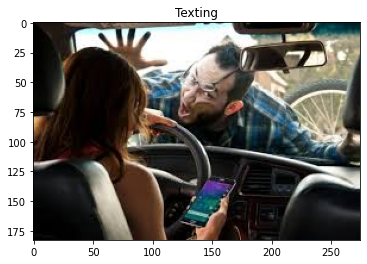

In [ ]:
# Viewing a sample of the image dataset
def read_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

image1 = read_image('/content/drive/Shareddrives/DeepLearning_Projects/Data-20211025T190642Z-001/Data/Training/Texting/Texting (1).jpeg')
plt.title('Texting')

plt.imshow(image1)


In [ ]:
# Rescaling all images by 1./255
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
# This is the target directory
        train_dir,
# Resizing all images to 224 x 224
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

# Target size is 224 x 224, batch size is 20
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 11732 images belonging to 6 classes.
Found 676 images belonging to 6 classes.


In [ ]:
VGG16=tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
from keras import layers
from keras import models

**Modeling:**

# Baseline model:

In [ ]:
# Building a simple baseline model
# from keras import layers
# from keras import models

model = models.Sequential()

# Convolution layer1
# The shape of input image is 224 x 224. 
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))

# MaxPooling layer1
model.add(layers.MaxPooling2D((2, 2)))

# Convolution layer2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# MaxPooling layer2
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
# Compiling the model
from keras import optimizers


model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [ ]:
# Fitting the model

import time

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=10)  

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 19s 2s/step - loss: 5.9893 - acc: 0.1800 - val_loss: 1.7605 - val_acc: 0.2050
Epoch 2/10
10/10 [==============================] - 18s 2s/step - loss: 1.7856 - acc: 0.2350 - val_loss: 1.7667 - val_acc: 0.2050
Epoch 3/10
10/10 [==============================] - 18s 2s/step - loss: 1.7830 - acc: 0.1850 - val_loss: 1.8202 - val_acc: 0.1500
Epoch 4/10
10/10 [==============================] - 18s 2s/step - loss: 1.7537 - acc: 0.2550 - val_loss: 1.7381 - val_acc: 0.4050
Epoch 5/10
10/10 [==============================] - 17s 2s/step - loss: 1.6815 - acc: 0.3600 - val_loss: 1.7066 - val_acc: 0.3400
Epoch 6/10
10/10 [==============================] - 18s 2s/step - loss: 1.6501 - acc: 0.3600 - val_loss: 1.6290 - val_acc: 0.3500
Epoch 7/10
10/10 [==============================] - 19s 2s/step - loss: 1.4461 - acc: 0.4700 - val_loss: 1.3820 - val_acc: 0.5000
Epoch 8/10
10/10 [==============================] - 18s 2s/step - loss: 1.2940 - acc: 0.56

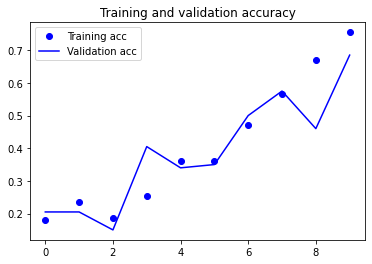

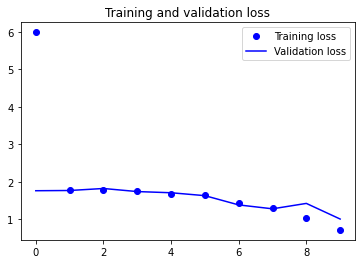

In [ ]:
# Taking a look at the learning curves

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Learning curve for Training and Validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Learning curve for training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Interpreting the results of baseline model**: 

*   From the training and validation accuracy plot, it can identified that the accuracy for both training and validation has gradually increased. Epochs is the number of times the learning algorithm works through the training dataset. Here, the curves indicate that the performance of the model has improved with increase in number of epochs. Continuing training on a good fit can lead to overfitting. 
*   From the training and validation loss plot, it can be observed that there is a sudden dip in training loss at epochs 1. Both training and validation loss decrease to a point of stability. However, the accuracy remains at 68.5%. Hence, we decided to build more models by tuning the hyperparameters.

# Model1: VGG_16 Transfer learning model

In [ ]:
import random as rn
os.environ['PYTHONHASHSEED'] = '0'
tf.keras.backend.clear_session()
np.random.seed(0)
rn.seed(0)
#Input layer
input_layer=Input(shape=(224,224,3),name='input_layer')

#VGG16 layer
output_vgg16=VGG16(input_layer)

#Convolution layer
Conv=Conv2D(filters=300,kernel_size=(3,3),strides=(1,1),padding='valid',data_format='channels_last',activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv')(output_vgg16)

#Maxpooling layer
maxpool=MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',name='maxpool')(Conv)
flatten=Flatten(data_format='channels_last')(maxpool)

#Fully Connected layer-1
FC1=Dense(100,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC1')(flatten)
dropout=Dropout(0.25)(FC1)

#Fully Connected layer-2
FC2=Dense(50,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=33),name='FC2')(dropout)
flatten=Flatten(data_format='channels_last')(FC2)

#Output layer
output=Dense(5,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3))(flatten)
model = Model(inputs=input_layer,outputs=output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
Conv (Conv2D)                (None, 5, 5, 300)         1382700   
_________________________________________________________________
maxpool (MaxPooling2D)       (None, 2, 2, 300)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
FC1 (Dense)                  (None, 100)               120100    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0     

In [ ]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

# Fitting the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=10)  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
200/200 [==============================] - 406s 2s/step - loss: 0.0106 - accuracy: 0.9972 - val_loss: 2.7624 - val_accuracy: 0.7100
Epoch 2/10
200/200 [==============================] - 407s 2s/step - loss: 0.0064 - accuracy: 0.9983 - val_loss: 2.2636 - val_accuracy: 0.7550
Epoch 3/10
200/200 [==============================] - 407s 2s/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 2.0216 - val_accuracy: 0.7950
Epoch 4/10
200/200 [==============================] - 405s 2s/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 2.2628 - val_accuracy: 0.7350
Epoch 5/10
200/200 [==============================] - 402s 2s/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 2.6392 - val_accuracy: 0.7600
Epoch 6/10
200/200 [==============================] - 394s 2s/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 2.0794 - val_accuracy: 0.7350
Epoch 7/10
200/200 [==============================] - 406s 2s/step - loss: 9.1616e-04 - accuracy: 0.9995 - val_loss: 3.0008 - val_accuracy: 0.

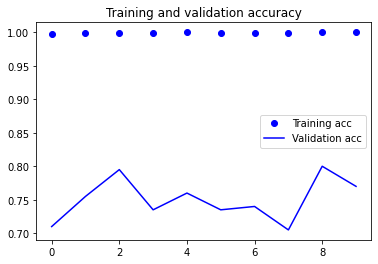

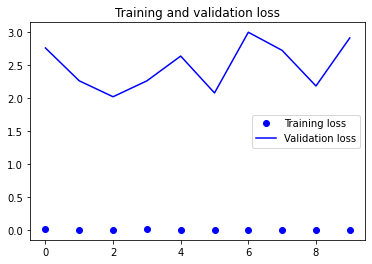

In [ ]:
# Taking a look at the learning curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Learning curve for Training and Validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Learning curve for training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Interpreting the results for Model 1:**

*   The validation curve gave us a better visual interpretation of changes in the performance on the model based on changes in certain parameters.
The training and validation accuracy plot reveals that the accuracy for training model was very high. The accuracy of validation remained constant after about 3 epochs.

*   The Training and Validation loss plot reveals that Validation loss is much greater than Training loss. Although, the accuracy is relatively high, there exists a huge gap between the two curves. This could mean that our model was overfit. The high validation loss indicates that our model was unable to learn the training dataset. It could also indicate that the model does not have a suitable capacity for the complexity of the dataset. 

*   Hence, we decided to try building another model with additional Convolution, MaxPooling and Dense layers.

# Model2: Custom build Convolution layer Model

In [ ]:
# Building the model5
# For this model, we used 4 convolution layers and 4 MaxPooling layers
from keras import layers
from keras import models

model = models.Sequential()

# Convolution layer1
# The shape of input image is 224 x 224. 
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))

# MaxPooling layer1
model.add(layers.MaxPooling2D((2, 2)))

# Convolution layer2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# MaxPooling layer2
model.add(layers.MaxPooling2D((2, 2)))

# Convolution layer3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# MaxPooling layer3
model.add(layers.MaxPooling2D((2, 2)))

# Convolution layer4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# MaxPooling layer4
model.add(layers.MaxPooling2D((2, 2)))

# Flattening the output from MaxPooling layer4
model.add(layers.Flatten())

# Fully connected layer1
model.add(layers.Dense(512, activation='relu'))

# Output layer
# This is a multiclass classification problem with 6 classes.
# Softmax activation function will help determing the probabilities of belonging to each class.
model.add(layers.Dense(6, activation='softmax')) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)      

In [ ]:
# Compiling the model
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [ ]:
# Fitting the model

import time

history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=10)  

end = time.time()

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
200/200 [==============================] - 402s 2s/step - loss: 1.4760 - acc: 0.4095 - val_loss: 1.9095 - val_acc: 0.5450
Epoch 2/10
200/200 [==============================] - 398s 2s/step - loss: 0.4556 - acc: 0.8562 - val_loss: 1.6651 - val_acc: 0.6700
Epoch 3/10
200/200 [==============================] - 395s 2s/step - loss: 0.1989 - acc: 0.9360 - val_loss: 1.5652 - val_acc: 0.7050
Epoch 4/10
200/200 [==============================] - 394s 2s/step - loss: 0.1100 - acc: 0.9645 - val_loss: 1.9679 - val_acc: 0.6900
Epoch 5/10
200/200 [==============================] - 394s 2s/step - loss: 0.0866 - acc: 0.9730 - val_loss: 1.4905 - val_acc: 0.7550
Epoch 6/10
200/200 [==============================] - 396s 2s/step - loss: 0.0646 - acc: 0.9818 - val_loss: 1.5512 - val_acc: 0.7700
Epoch 7/10
200/200 [==============================] - 397s 2s/step - loss: 0.0512 - acc: 0.9850 - val_loss: 2.0111 - val_acc: 0.7450
Epoch 8/10
200/200 [==============================] - 399s 2s/step - 

**Results**:

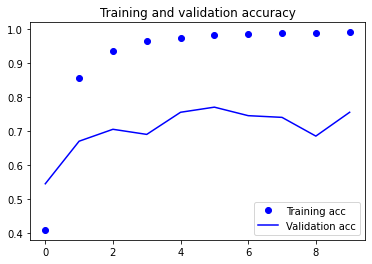

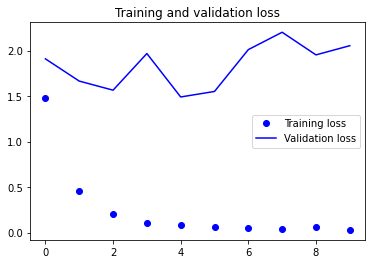

In [ ]:
# Taking a look at the learning curves

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Learning curve for Training and Validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Learning curve for training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Evaluating the model on test data
import numpy as np
batch_size = 20

test_generator = ImageDataGenerator()

# Target size is 224 x 224, batch size is 20
# Shuffle has been set to False so that samples don't get shuffled and have the same order of classes.
test_data_generator = test_generator.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20, 
        shuffle = False)

# Steps of epochs is the number of images in test data / batch size
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

# Predicting the classes
predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)


Found 676 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
# Defining the true class
true_classes = test_data_generator.classes

# Defining the labels for each class
class_labels = list(test_data_generator.class_indices.keys())  

In [ ]:
# Printing the classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

                 precision    recall  f1-score   support

Drinking-eating       0.82      0.91      0.86       180
  EyesNotOnRoad       0.89      0.98      0.93       100
         Makeup       0.51      0.62      0.56        40
   Safe drivers       0.65      1.00      0.79       100
 TalkingOnPhone       0.73      0.77      0.75       129
        Texting       0.65      0.16      0.25       127

       accuracy                           0.75       676
      macro avg       0.71      0.74      0.69       676
   weighted avg       0.74      0.75      0.71       676



In [ ]:
# Printing the confusion matrix
print(confusion_matrix(true_classes, predicted_classes, labels))

[[163   2   9   1   2   3]
 [  0  98   2   0   0   0]
 [ 11   0  25   0   0   4]
 [  0   0   0 100   0   0]
 [ 14   3   8   1  99   4]
 [ 10   7   5  51  34  20]]


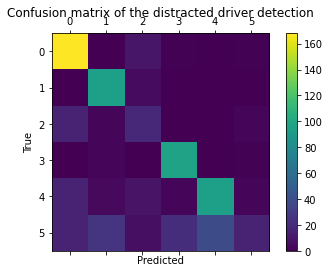

In [ ]:
# Plotting the confusion matrix based on the following labels:

# 0 - Drinking-eating
# 1 - EyesNotOnRoad
# 2 - Makeup
# 3 - SafeDrivers
# 4 - TalkingOnPhone
# 5 - Texting

from sklearn.metrics import confusion_matrix

# Defining the labels for each class.
labels = [0,1,2,3,4,5]

# Creating a temporary variable for confusion matrix
cm = confusion_matrix(true_classes, predicted_classes, labels)

# Creating the plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for the distracted driver detection')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Interpreting the results**:
*   From the learning curves, it is observed that the training accuracy is greater than validation accuracy. The number of epochs determines the number of times the weights in the neural network get updated. Here, the accuracy seems to remain constant for both training and validation after about 4 epochs. The validation loss appears to be greater than training loss. The validation loss seems to decrease till about 3 epochs. Thus, the curve stabilizes after a certain point. This indicates that the performance of the model was slowly improving. 

* Comparing the baseline model, model1 and model2, it can be identified that model2 has a better performance. Tweaking some of the hyperparameters such as adding more Convolution layers, MaxPooling layers, Dense layer and further experimenting with the values of drop out, activation, epochs, steps per epochs, kernel size, batch size and number of feature maps to be generated helped us obtain a better model. Initially, when we tried working with around 500 images in each class, our model performed poorly. However, enriching our data with some more images for training helped boost the overall performance. Stacking more convolution layers allowed the layers that are close to the input to better learn the low-level features (for example – lines). In addition, it also allowed the deeper layers to better learn the higher-order features (for example – specific shapes). The batch size of 20 helped reduce the memory required for training. We also increased the filter size from 32, 64 to 128 for subsequent convolution layers to capture as many combinations of patterns as possible. 

* The accuracy of classification on the testing dataset was 75%. The confusion matrix helped us identify the number of correct and incorrect predictions. Out of 676 images, 505 images were correctly classified. This misclassification rate or percentage of classifications that are incorrect can thus be calculated to be 0.25.

* The classification report also played a huge role in evaluating the performance of our model. Precision is an indicator of the model's ability to identify the relevant points. The highest preicision obtained was for EyesNotOnRoad (0.89). In addition, the recall helped us better understand how accurately our model identified relevant points. The highest recall was for 'Safe drivers'. This indicates that our model correctly classified all the drivers driving safe. This was followed by 'EyesNotOnRoad' and 'Drinking-eating'. Recall is a key performance metric for our project because incorrectly classifying a distracted driver as a safe driver could have adverse consequences. This could put the life of the driver, passengers, and others on the road in danger. 
*	Apart from vehicle monitoring systems, audio and visual alert systems installed in vehicles, dashboard cameras implemented based on such a model can better safeguard the lives of people. These applications can be used by companies to provide better insurance to customers and enhance customer satisfaction. Dashboard cameras with safety detection systems can also be a great solution for worried parents and driving instructors.

*	In addition, some drivers purposely cause accidents or fake injuries to extort money from victims and insurance companies. Simply put, dashboard cameras would also prevent insurance fraud. 

**Conclusion**:

•	In this project, we began working with a small-sized image dataset that was extracted from Google Images. This was further enriched with more images from existing data sources on the internet. 

•	Each image was labeled based on its class and placed into separate folders for training and testing. Our dataset has 11732 images for training 676 images for testing.

•	This was followed by taking a look at some of the images to get a better understanding, verifying the class labels, resizing and preparation of images for modeling. A baseline model was built based on random guessing. Furthermore, 2 models were built by adjusting the hyperparameters until satisfactory results were obtained.

•	Classification report, confusion matrix and learning curves were used to determine the key performance metrics. The results for each model were compared in order to come up with a better-performing model. The second Convolution Neural Network model showed a better performance compared to the others. It had an accuracy of 77%.

•	With better feature detection, the idea of using dashboard cameras for detecting distracted drivers can be expanded for applications like detecting drowsiness, steering angles, and position of hands on the steering. In addition, images that capture several angles from inside the vehicle would further aid in detecting more features. High-level feature extraction would improve the detection of distracted drivers. Distracted driver detection would thus make the road a safer and better place for everybody.



## Additional Models

We ran additional transfer learning  models by doing secondary research from the link below: 
https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/

# Additional model1 : Inception_V3 Transfer learning Model

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
Inception = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in Inception.layers:
    layer.trainable = False

In [ ]:
input_Incept = layers.Flatten()(Inception.output)

# Add a fully connected layer with 1024 hidden units and ReLU activation
FC = layers.Dense(1024, activation='relu')(input_Incept)

# Add a dropout rate of 0.2
Drop = layers.Dropout(0.2)(FC)

# Add a final softmax layer with 6 node for classification output
output = layers.Dense(6, activation='softmax')(Drop)

model = tf.keras.models.Model(Inception.input, output)

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
import time
history = model.fit_generator(train_generator,steps_per_epoch =100,epochs=20,validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 812s 8s/step - loss: 2.2396 - accuracy: 0.6000 - val_loss: 0.9701 - val_accuracy: 0.6923
Epoch 2/20
100/100 [==============================] - 567s 6s/step - loss: 0.5009 - accuracy: 0.8430 - val_loss: 1.1392 - val_accuracy: 0.6849
Epoch 3/20
100/100 [==============================] - 507s 5s/step - loss: 0.3168 - accuracy: 0.8990 - val_loss: 0.9415 - val_accuracy: 0.7648
Epoch 4/20
100/100 [==============================] - 436s 4s/step - loss: 0.2579 - accuracy: 0.9180 - val_loss: 0.9523 - val_accuracy: 0.7441
Epoch 5/20
100/100 [==============================] - 392s 4s/step - loss: 0.1893 - accuracy: 0.9370 - val_loss: 0.9712 - val_accuracy: 0.7337
Epoch 6/20
100/100 [==============================] - 355s 4s/step - loss: 0.1525 - accuracy: 0.9500 - val_loss: 0.9180 - val_accuracy: 0.7840
Epoch 7/20
100/100 [==============================] - 340s 3s/step - loss: 0.1244 - accuracy: 0.9608 - val_loss: 1.0240 - val_accuracy: 0.7751

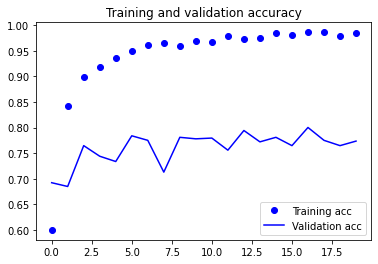

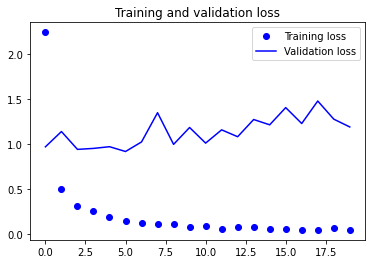

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Learning curve for Training and Validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Learning curve for training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Interpeting results for validation curves:**

The training accuracy seems to increase with increase in the number of epochs. The validation accuracy seems to remain the same with increase in the number of epochs. From the Accuracy curves we can say that this model is overfit.

The training loss decreases with increase in number of epochs. There is a sudden dip in training loss at about epochs 1. The validation loss seems to remain constant the entire time. This could indicate that the validation model was unable to learn efficiently. The performance of the validation model does not show any improvement.

# Additional model2: EfficientNet Transfer Learning Model

In [ ]:
!pip install -U efficientnet

     |████████████████████████████████| 50 kB 3.1 MB/s 


In [ ]:
from tensorflow.keras.applications import EfficientNetB3

In [ ]:
efficient = EfficientNetB3(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [ ]:
for layer in efficient.layers:
    layer.trainable = False

In [ ]:
input_efficient = layers.Flatten()(efficient.output)

# Add a fully connected layer with 1024 hidden units and ReLU activation
FC = layers.Dense(1024, activation='relu')(input_efficient)

# Add a dropout rate of 0.2
Drop = layers.Dropout(0.2)(FC)

# Add a final softmax layer with 6 node for classification output
output = layers.Dense(6, activation='softmax')(Drop)

model1 = tf.keras.models.Model(efficient.input, output)

model1.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
import time
history = model1.fit_generator(train_generator,steps_per_epoch =100,epochs=20,validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 356s 3s/step - loss: 2.6545 - accuracy: 0.1700 - val_loss: 1.8438 - val_accuracy: 0.1879
Epoch 2/20
100/100 [==============================] - 338s 3s/step - loss: 1.8081 - accuracy: 0.1620 - val_loss: 1.7873 - val_accuracy: 0.1879
Epoch 3/20
100/100 [==============================] - 343s 3s/step - loss: 1.7967 - accuracy: 0.1725 - val_loss: 1.7899 - val_accuracy: 0.2663
Epoch 4/20
100/100 [==============================] - 334s 3s/step - loss: 1.7941 - accuracy: 0.1710 - val_loss: 1.8121 - val_accuracy: 0.1479
Epoch 5/20
100/100 [==============================] - 332s 3s/step - loss: 1.7923 - accuracy: 0.1596 - val_loss: 1.8044 - val_accuracy: 0.2663
Epoch 6/20
100/100 [==============================] - 329s 3s/step - loss: 1.7931 - accuracy: 0.1645 - val_loss: 1.7916 - val_accuracy: 0.2663
Epoch 7/20
100/100 [==============================] - 330s 3s/step - loss: 1.7918 - accuracy: 0.1675 - val_loss: 1.7916 - val_accuracy: 0.2663

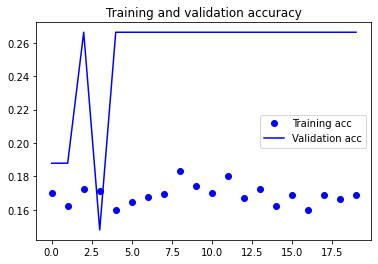

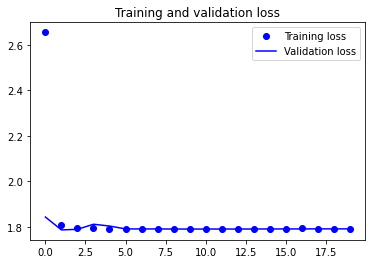

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Learning curve for Training and Validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Learning curve for training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Interpeting results for validation curves:**

The training accuracy seems remain constant from about epoch 4. The validation accuracy seems to remain the same with increase in the number of epochs. From the Accuracy curves we can say that this model is Underfit.

The training loss decreases with increase in number of epochs. There is a sudden dip in training loss at about epochs 1. The validation loss seems to remain constant the entire time. This could indicate that the validation model was unable to learn efficiently. There is a huge gap between the two curves. The performance of the validation model does not show any improvement.

# Additional Model3: ResNet Transfer Learning Model

In [ ]:
from tensorflow.keras.applications import ResNet50

ResNet = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [ ]:
for layer in ResNet.layers:
    layer.trainable = False

In [ ]:
input_Res = layers.Flatten()(ResNet.output)

# Add a fully connected layer with 1024 hidden units and ReLU activation
FC = layers.Dense(1024, activation='relu')(input_Res)

# Add a dropout rate of 0.2
Drop = layers.Dropout(0.2)(FC)

# Add a final softmax layer with 6 node for classification output
output = layers.Dense(6, activation='softmax')(Drop)

model2 = tf.keras.models.Model(ResNet.input, output)

model2.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
import time
history = model2.fit_generator(train_generator,steps_per_epoch =100,epochs=20,validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 497s 5s/step - loss: 2.2806 - accuracy: 0.2965 - val_loss: 1.4857 - val_accuracy: 0.4837
Epoch 2/20
100/100 [==============================] - 482s 5s/step - loss: 1.5006 - accuracy: 0.4175 - val_loss: 1.4729 - val_accuracy: 0.4127
Epoch 3/20
100/100 [==============================] - 487s 5s/step - loss: 1.3698 - accuracy: 0.4725 - val_loss: 1.8149 - val_accuracy: 0.2470
Epoch 4/20
100/100 [==============================] - 489s 5s/step - loss: 1.2972 - accuracy: 0.5235 - val_loss: 1.4913 - val_accuracy: 0.5207
Epoch 5/20
100/100 [==============================] - 490s 5s/step - loss: 1.1839 - accuracy: 0.5715 - val_loss: 1.3922 - val_accuracy: 0.4867
Epoch 6/20
100/100 [==============================] - 491s 5s/step - loss: 1.0793 - accuracy: 0.6215 - val_loss: 1.2161 - val_accuracy: 0.5858
Epoch 7/20
100/100 [==============================] - 491s 5s/step - loss: 1.0083 - accuracy: 0.6616 - val_loss: 1.1981 - val_accuracy: 0.6021

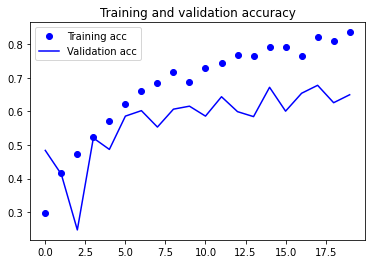

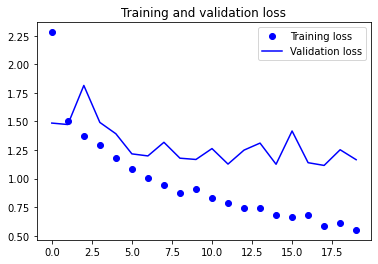

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Learning curve for Training and Validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Learning curve for training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Interpreting the results for validation curves:

*   The validation curve gave us a better visual interpretation of changes in the performance on the model based on changes in certain parameters.
The training and validation accuracy plot reveal that there is an increase in the accuracy with increase in epochs. **At 15th epoch validation accuracy is 67.15%** it is so close to base line model accuray. And this model preformed well on both train and validation. **so far, this is the best model in Transfer learning models.** 

*   The Training and Validation loss attains stability after a certain point. This indicates that the performance of the model has gradually improved. 







**Citations**:
1. Flávio Rosendo da Silva Oliveira and Felipe Costa Farias, “Comparing Transfer learning approaches applied to distracted driving detection”, IEEE Latin American Conference on Computational Intelligence (LA-CCI) (2018)


2. Andrei Aksjonov , Pavel Nedoma, Valery Vodovozov, Eduard Petlenkov, and Martin Herrmann, “Detection and evaluation of Driver Distraction using Machine Learning and Fuzzy logic, “ IEEE Transactions on Intelligent Transportation systems, vol. 20, no. 6, June 2019.

3. Abdul Jamsheed V. et al., “Real -time detection of distracted drivers using CNN”, Proceedings of the Third International Conference on Smart Systems and Inventive Technology (ICSSIT) (2020).


4. Manjula Kumari, Hari C.V, Praveen Sankaran, “Driver distraction analysis using Convolutional Neural Networks”, International Conference on Data Science and Engineering (ICDSE) (2018).


5. Wang, J. , Wu, Z., Li, F., Zhang, J.,  “A Data Augmentation Approach to Distracted Driving Detection”, Future Internet 2021
https://dx.doi.org/ 10.3390/fi13010001 


6. Duy Tran Ha Manh Do, Weihua Sheng, He Bai2, Girish Chowdhary, “Real-time detection of distracted driving based on deep learning”, IET Intelligent Transport Systems, 2018.


7. Vyom Unadkat, Parth Sayani, Harshal Kapadia, “Automated System for Detecting Distracted Driver”, 4th International Conference on Computing Communication and Automation (ICCCA), 2018.


8. Duy Tran, Ha Manh Do, Jiaxing Lu “Real-time Detection of Distracted Driving using Dual Cameras”, IEEE/RSJ International Conference on Intelligent Robots and Systems (IROS), 2020.


9. Hesham M. Eraqi, Yehya Abouelnaga, Mohamed H. Saad, Mohamed N. Moustafa, "Driver Distraction Identification with an Ensemble of Convolutional Neural Networks", Journal of Advanced Transportation, vol. 2019, Article ID 4125865, 12 pages, 2019. 


10. O. G. Basubeit, D. N. T. How, Y. C. Hou, K. S. M. Sahari , “Distracted Driver Detection with Deep Convolutional Neural Network”, International Journal of Recent Technology and Engineering (IJRTE), Volume-8 Issue-4, November 2010.



**References**:

1. State Farm Distracted Driver Detection | https://www.kaggle.com/c/state-farm-distracted-driver-detection/data
2. Transfer learning models | https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/